In [1]:
pip install tweepy

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install pyLDAvis

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install pymupdf

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install vaderSentiment

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install TextBlob

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install emoji

Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [8]:
import os
import re
import ast
import nltk
import fitz
import emoji  
import pandas as pd
import unicodedata
import contractions
import string
#Gensim
import gensim
import gensim.corpora as corpora
from gensim.models.ldamodel import LdaModel
#spacy
import spacy
#vis
import pyLDAvis
import pyLDAvis.gensim_models
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

/Users/peiiiiu227/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [9]:
df = pd.read_csv('Tesla.csv')

In [10]:
df

,created_at,text,author_id,context_annotations,conversation_id,entities,geo,in_reply_to_user_id,lang,public_metrics,possibly_sensitive,referenced_tweets,source,date,count
0,2024-04-26 23:59:59+00:00,RT @stillgray: BREAKING: Elon Musk dubs Facebo...,847076361802076160,"[{'domain': {'id': '46', 'name': 'Business Tax...",1784009561688428814,"{'mentions': [{'start': 3, 'end': 13, 'usernam...",NaN,NaN,en,"{'retweet_count': 1126, 'reply_count': 0, 'lik...",False,[<ReferencedTweet id=1783968424303239651 type=...,NaN,2024-04-26,1.0
1,2024-04-26 23:59:59+00:00,RT @SawyerMerritt: NEWS: Tesla has given a dem...,1619704664035033088,"[{'domain': {'id': '46', 'name': 'Business Tax...",1784009561466454466,"{'mentions': [{'start': 3, 'end': 17, 'usernam...",NaN,NaN,en,"{'retweet_count': 438, 'reply_count': 0, 'like...",False,[<ReferencedTweet id=1783918099609083963 type=...,NaN,2024-04-26,1.0
2,2024-04-26 23:59:58+00:00,RT @iluminatibot: This is the bottom of the su...,895255477,"[{'domain': {'id': '46', 'name': 'Business Tax...",1784009558739882125,"{'urls': [{'start': 104, 'end': 127, 'url': 'h...",NaN,NaN,en,"{'retweet_count': 1055, 'reply_count': 0, 'lik...",False,[<ReferencedTweet id=1783551754279280690 type=...,NaN,2024-04-26,1.0
3,2024-04-26 23:59:58+00:00,RT @teslaenergy: Today we welcomed 200+ in Tok...,2369988672,"[{'domain': {'id': '46', 'name': 'Business Tax...",1784009557297209409,"{'mentions': [{'start': 3, 'end': 15, 'usernam...",NaN,NaN,en,"{'retweet_count': 119, 'reply_count': 0, 'like...",False,[<ReferencedTweet id=1783963347752296683 type=...,NaN,2024-04-26,1.0
4,2024-04-26 23:59:57+00:00,RT @stillgray: BREAKING: Elon Musk dubs Facebo...,572353254,"[{'domain': {'id': '46', 'name': 'Business Tax...",1784009551622312013,"{'mentions': [{'start': 3, 'end': 13, 'usernam...",NaN,NaN,en,"{'retweet_count': 1126, 'reply_count': 0, 'lik...",False,[<ReferencedTweet id=1783968424303239651 type=...,NaN,2024-04-26,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,2024-05-03 17:31:50+00:00,RT @aniquilante: Hoy se cumplen 4 años de la v...,130215108,"[{'domain': {'id': '46', 'name': 'Business Tax...",1786448596696469679,"{'mentions': [{'start': 3, 'end': 15, 'usernam...",NaN,NaN,es,"{'retweet_count': 2, 'reply_count': 0, 'like_c...",False,[<ReferencedTweet id=1786431262623715405 type=...,NaN,2024-05-03,NaN
2388,2024-05-03 17:31:50+00:00,"@elonmusk, #Question: When are your #Nikola ca...",19021138,"[{'domain': {'id': '45', 'name': 'Brand Vertic...",1786448596646187342,"{'mentions': [{'start': 0, 'end': 9, 'username...",NaN,4.419640e+07,en,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",False,NaN,NaN,2024-05-03,NaN
2389,2024-05-03 17:31:50+00:00,RT @NoContextHumans: Petrol in a Tesla ? 🤣 htt...,1300753268319096833,"[{'domain': {'id': '46', 'name': 'Business Tax...",1786448594897154169,"{'mentions': [{'start': 3, 'end': 19, 'usernam...",NaN,NaN,es,"{'retweet_count': 224, 'reply_count': 0, 'like...",False,[<ReferencedTweet id=1786379566270820387 type=...,NaN,2024-05-03,NaN
2390,2024-05-03 17:31:48+00:00,@Fj_Paro @MartinViecha @elonmusk @Tesla hahaha...,1734946477397417984,"[{'domain': {'id': '46', 'name': 'Business Tax...",1786429512533876833,"{'mentions': [{'start': 0, 'end': 8, 'username...",NaN,1.551822e+18,tl,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",False,[<ReferencedTweet id=1786439639009575161 type=...,NaN,2024-05-03,NaN


In [11]:
# Remove duplicate rows
df = df.drop_duplicates()

In [12]:
df['date'] = pd.to_datetime(df['date'])

/var/folders/s2/xss5fp2j1c33yb7n8z1gc6t00000gn/T/ipykernel_53293/3532345252.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df['date'])


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2164 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   created_at           2164 non-null   object        
 1   text                 2164 non-null   object        
 2   author_id            2164 non-null   int64         
 3   context_annotations  2164 non-null   object        
 4   conversation_id      2164 non-null   int64         
 5   entities             2156 non-null   object        
 6   geo                  16 non-null     object        
 7   in_reply_to_user_id  782 non-null    float64       
 8   lang                 2164 non-null   object        
 9   public_metrics       2164 non-null   object        
 10  possibly_sensitive   2164 non-null   bool          
 11  referenced_tweets    1989 non-null   object        
 12  source               0 non-null      float64       
 13  date                 2164 non-null   d

/var/folders/s2/xss5fp2j1c33yb7n8z1gc6t00000gn/T/ipykernel_53293/3768648310.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['count'] = 1


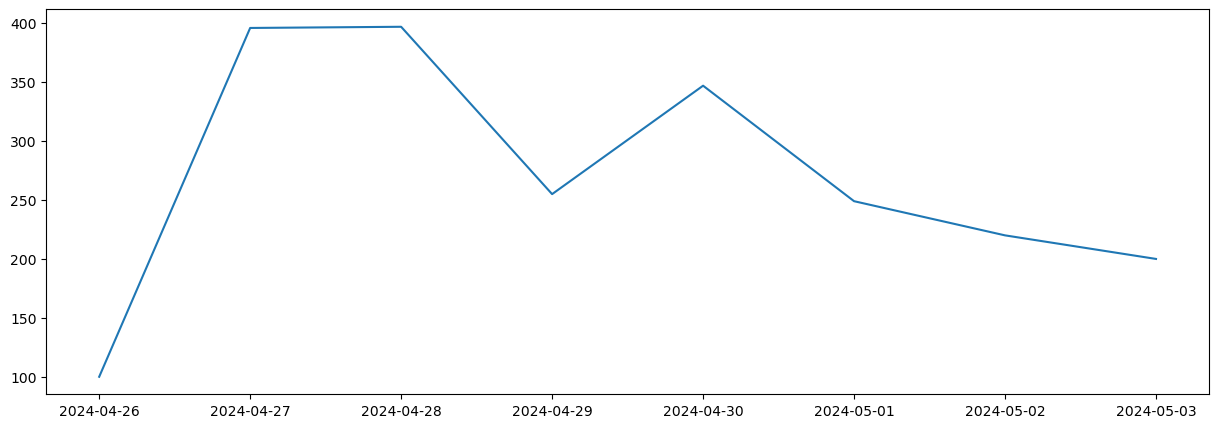

In [14]:
df['count'] = 1
plt.figure(figsize=[15,5])
plt.plot(df.groupby(by=['date'])['author_id'].count())

In [15]:
# Convert string representations of dictionaries to actual dictionaries
df['public_metrics'] = df['public_metrics'].apply(
    lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

# Extracting each metric into its own column
df['quote_count'] = df['public_metrics'].apply(lambda x: x.get('quote_count', 0))
df['reply_count'] = df['public_metrics'].apply(lambda x: x.get('reply_count', 0))
df['retweet_count'] = df['public_metrics'].apply(lambda x: x.get('retweet_count', 0))
df['like_count'] = df['public_metrics'].apply(lambda x: x.get('like_count', 0))

/var/folders/s2/xss5fp2j1c33yb7n8z1gc6t00000gn/T/ipykernel_53293/1356263911.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['public_metrics'] = df['public_metrics'].apply(
/var/folders/s2/xss5fp2j1c33yb7n8z1gc6t00000gn/T/ipykernel_53293/1356263911.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['quote_count'] = df['public_metrics'].apply(lambda x: x.get('quote_count', 0))
/var/folders/s2/xss5fp2j1c33yb7n8z1gc6t00000gn/T/ipykernel_53293/1356263911.py:7: SettingWithCopyWarning: 
A value is tryin

In [16]:
popularity_df = df[['date','author_id','text','quote_count', 'reply_count', 'retweet_count', 'like_count']]

In [17]:
popularity_df

,date,author_id,text,quote_count,reply_count,retweet_count,like_count
0,2024-04-26,847076361802076160,RT @stillgray: BREAKING: Elon Musk dubs Facebo...,0,0,1126,0
1,2024-04-26,1619704664035033088,RT @SawyerMerritt: NEWS: Tesla has given a dem...,0,0,438,0
2,2024-04-26,895255477,RT @iluminatibot: This is the bottom of the su...,0,0,1055,0
3,2024-04-26,2369988672,RT @teslaenergy: Today we welcomed 200+ in Tok...,0,0,119,0
4,2024-04-26,572353254,RT @stillgray: BREAKING: Elon Musk dubs Facebo...,0,0,1126,0
...,...,...,...,...,...,...,...
2387,2024-05-03,130215108,RT @aniquilante: Hoy se cumplen 4 años de la v...,0,0,2,0
2388,2024-05-03,19021138,"@elonmusk, #Question: When are your #Nikola ca...",0,0,0,0
2389,2024-05-03,1300753268319096833,RT @NoContextHumans: Petrol in a Tesla ? 🤣 htt...,0,0,224,0
2390,2024-05-03,1734946477397417984,@Fj_Paro @MartinViecha @elonmusk @Tesla hahaha...,0,0,0,0


In [18]:
popularity_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2164 entries, 0 to 2391
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           2164 non-null   datetime64[ns]
 1   author_id      2164 non-null   int64         
 2   text           2164 non-null   object        
 3   quote_count    2164 non-null   int64         
 4   reply_count    2164 non-null   int64         
 5   retweet_count  2164 non-null   int64         
 6   like_count     2164 non-null   int64         
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 135.2+ KB


/Users/peiiiiu227/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/peiiiiu227/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/peiiiiu227/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/peiiiiu227/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future

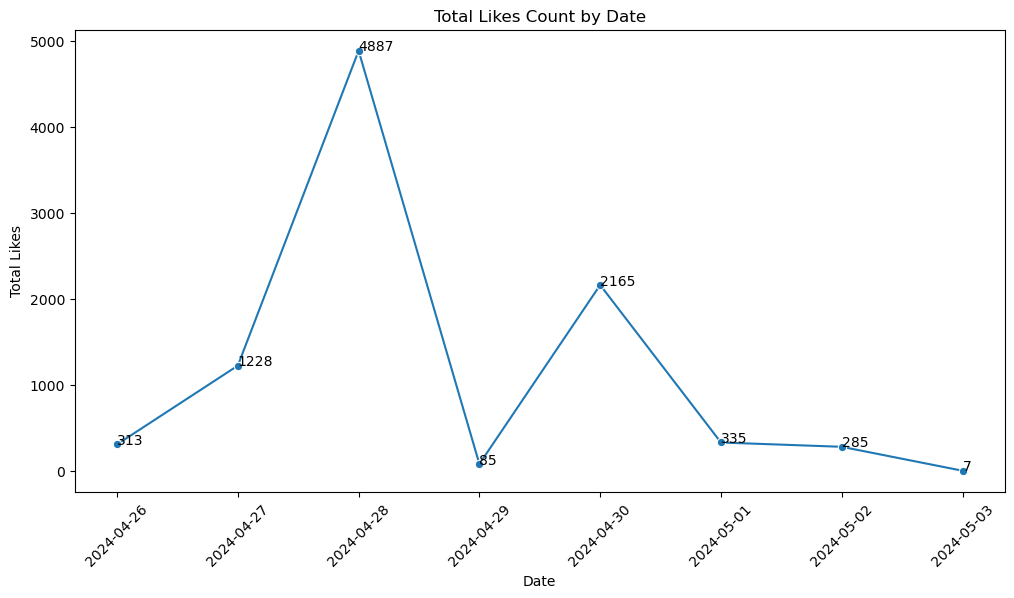

In [19]:
# Group by 'date' and sum 'like_count'
like_counts_by_date = popularity_df.groupby('date')['like_count'].sum().reset_index()

# Plotting using seaborn lineplot
plt.figure(figsize=(12, 6))  # Set the figure size for better visibility
lineplot = sns.lineplot(data=like_counts_by_date, x='date', y='like_count', marker='o')  # Using a marker for each data point

plt.title('Total Likes Count by Date')  # Title of the plot
plt.xlabel('Date')  # Label for the x-axis
plt.ylabel('Total Likes')  # Label for the y-axis
plt.xticks(rotation=45)  # Rotate the date labels for better legibility

# Adding annotations for each point
for index, row in like_counts_by_date.iterrows():
    plt.text(row['date'], row['like_count'], str(row['like_count']), color='black', ha='left')

plt.show()

/Users/peiiiiu227/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/peiiiiu227/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/peiiiiu227/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/peiiiiu227/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future

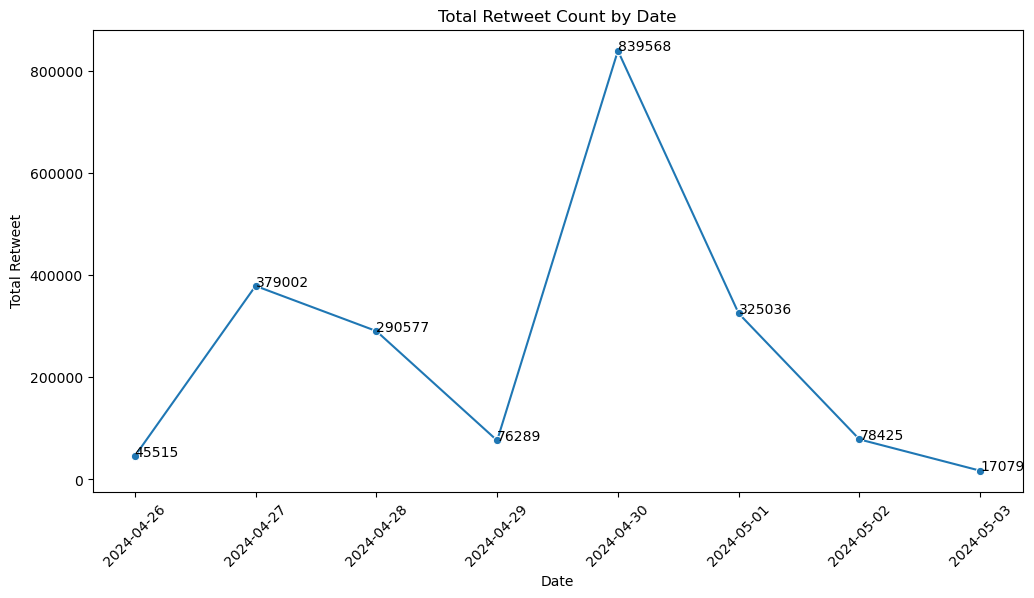

In [20]:
# Group by 'date' and sum 'like_count'
retweet_counts_by_date = popularity_df.groupby('date')['retweet_count'].sum().reset_index()

# Plotting using seaborn lineplot
plt.figure(figsize=(12, 6))  # Set the figure size for better visibility
lineplot_2 = sns.lineplot(data=retweet_counts_by_date, x='date', y='retweet_count', marker='o')  # Using a marker for each data point

plt.title('Total Retweet Count by Date')  # Title of the plot
plt.xlabel('Date')  # Label for the x-axis
plt.ylabel('Total Retweet')  # Label for the y-axis
plt.xticks(rotation=45)  # Rotate the date labels for better legibility

# Adding annotations for each point
for index, row in retweet_counts_by_date.iterrows():
    plt.text(row['date'], row['retweet_count'], str(row['retweet_count']), color='black', ha='left')

plt.show()

/Users/peiiiiu227/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/peiiiiu227/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/peiiiiu227/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/peiiiiu227/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future

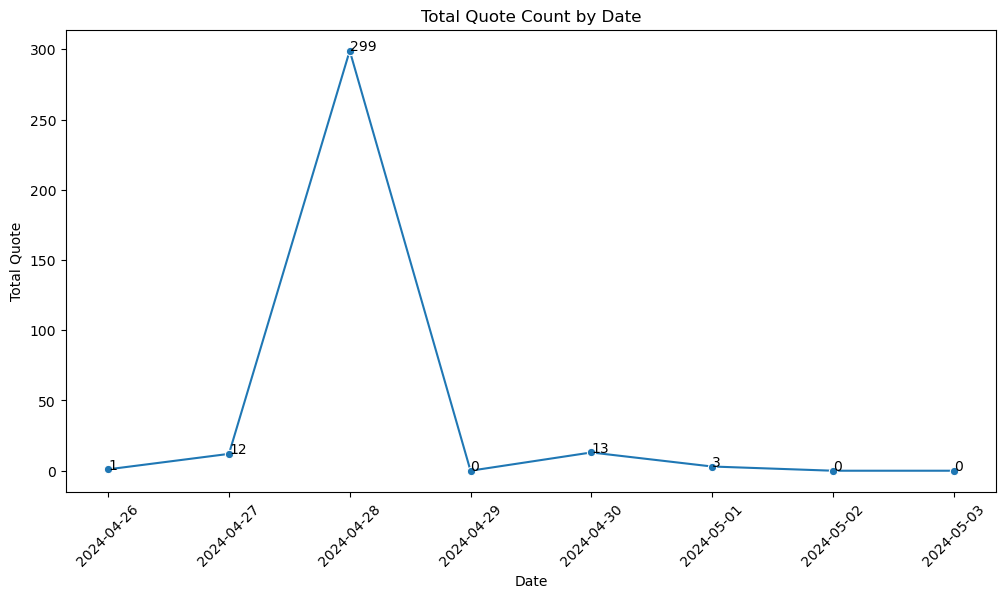

In [21]:
quote_counts_by_date = popularity_df.groupby('date')['quote_count'].sum().reset_index()

# Plotting using seaborn lineplot
plt.figure(figsize=(12, 6))  # Set the figure size for better visibility
lineplot_3 = sns.lineplot(data=quote_counts_by_date, x='date', y='quote_count', marker='o')  # Using a marker for each data point

plt.title('Total Quote Count by Date')  # Title of the plot
plt.xlabel('Date')  # Label for the x-axis
plt.ylabel('Total Quote')  # Label for the y-axis
plt.xticks(rotation=45)  # Rotate the date labels for better legibility

# Adding annotations for each point
for index, row in quote_counts_by_date.iterrows():
    plt.text(row['date'], row['quote_count'], str(row['quote_count']), color='black', ha='left')

plt.show()

/Users/peiiiiu227/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/peiiiiu227/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/peiiiiu227/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/peiiiiu227/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future

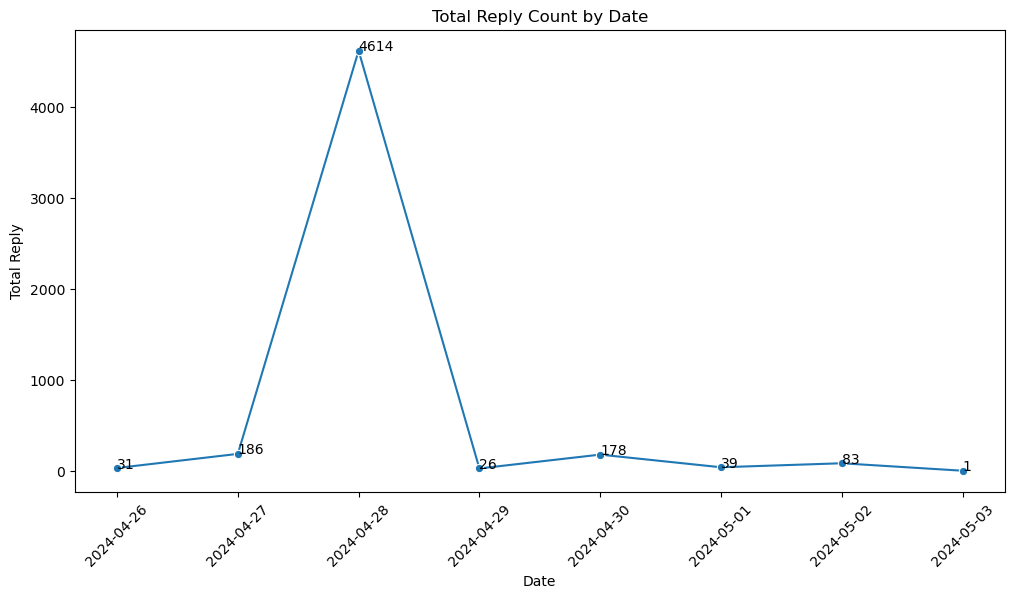

In [22]:
reply_counts_by_date = popularity_df.groupby('date')['reply_count'].sum().reset_index()

# Plotting using seaborn lineplot
plt.figure(figsize=(12, 6))  # Set the figure size for better visibility
lineplot = sns.lineplot(data=reply_counts_by_date, x='date', y='reply_count', marker='o')  # Using a marker for each data point

plt.title('Total Reply Count by Date')  # Title of the plot
plt.xlabel('Date')  # Label for the x-axis
plt.ylabel('Total Reply')  # Label for the y-axis
plt.xticks(rotation=45)  # Rotate the date labels for better legibility

# Adding annotations for each point
for index, row in reply_counts_by_date.iterrows():
    plt.text(row['date'], row['reply_count'], str(row['reply_count']), color='black', ha='left')

plt.show()

In [23]:
popularity_df = popularity_df.sort_values(by=['like_count'],ascending=False)
popularity_df.head()

,date,author_id,text,quote_count,reply_count,retweet_count,like_count
771,2024-04-30,96015193,The collapse of Tesla’s supercharger business ...,7,38,93,1571
1331,2024-04-28,1685873604,"When two bold women exit a Tesla Cybertruck, p...",144,2212,74,1137
337,2024-04-28,1685873604,"When two bold women exit a Tesla Cybertruck, p...",142,2208,73,1129
1343,2024-04-28,14084713,Heads up .. my first impressions drive of Supe...,4,35,24,756
350,2024-04-28,14084713,Heads up .. my first impressions drive of Supe...,4,35,24,755


In [24]:
# Cleaning and removing the above stop words list from the tweet text
stop_words = stopwords.words('english')
# new_stopwords = ["all", "due", "to", "on", "daily"]
# stpwrd.extend(new_stopwords)
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in stop_words])
df['text'] = df['text'].apply(lambda text: cleaning_stopwords(text))
df['text'].head()

/var/folders/s2/xss5fp2j1c33yb7n8z1gc6t00000gn/T/ipykernel_53293/1277690920.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text'] = df['text'].apply(lambda text: cleaning_stopwords(text))


0    RT @stillgray: BREAKING: Elon Musk dubs Facebo...
1    RT @SawyerMerritt: NEWS: Tesla given demonstra...
2    RT @iluminatibot: This bottom supply chain iPh...
3    RT @teslaenergy: Today welcomed 200+ Tokyo lea...
4    RT @stillgray: BREAKING: Elon Musk dubs Facebo...
Name: text, dtype: object

In [25]:
# Remove URLs
def remove_URLs(data):
    return re.sub('((http://)[^ ]*|(https://)[^ ]*|( www\.)[^ ]*)',' ',data)
df['text'] = df['text'].apply(lambda x: remove_URLs(x))

<>:3: DeprecationWarning: invalid escape sequence '\.'
<>:3: DeprecationWarning: invalid escape sequence '\.'
/var/folders/s2/xss5fp2j1c33yb7n8z1gc6t00000gn/T/ipykernel_53293/3788545888.py:3: DeprecationWarning: invalid escape sequence '\.'
  return re.sub('((http://)[^ ]*|(https://)[^ ]*|( www\.)[^ ]*)',' ',data)
/var/folders/s2/xss5fp2j1c33yb7n8z1gc6t00000gn/T/ipykernel_53293/3788545888.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text'] = df['text'].apply(lambda x: remove_URLs(x))


In [26]:
def remove_punctuations(data):
    # Correct regex pattern to replace all specified punctuations with a space
    return re.sub(r"[~.,%/:;?_&+*=!-]", " ", data)

# Assuming 'df' is your DataFrame and 'text' is the column you're modifying
df['text'] = df['text'].apply(lambda x: remove_punctuations(x))

/var/folders/s2/xss5fp2j1c33yb7n8z1gc6t00000gn/T/ipykernel_53293/3728159047.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text'] = df['text'].apply(lambda x: remove_punctuations(x))


In [27]:
df['text'] = df['text'].apply(lambda x: emoji.demojize(x))

/var/folders/s2/xss5fp2j1c33yb7n8z1gc6t00000gn/T/ipykernel_53293/3982629555.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text'] = df['text'].apply(lambda x: emoji.demojize(x))


In [28]:
def remove_mentions(data):
  pattern = r'@\w+'
  return re.sub(pattern," ",data)
df['text']= df['text'].apply(lambda x: remove_mentions(x))

/var/folders/s2/xss5fp2j1c33yb7n8z1gc6t00000gn/T/ipykernel_53293/2932018110.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text']= df['text'].apply(lambda x: remove_mentions(x))


# Tweets mentioning certain topics

In [29]:
cybertruck = df['text'].apply(lambda x: 'cybertruck' in x.lower())
filtered_df = df[cybertruck]
num_mentions = len(filtered_df)
print("Total mentions of 'Cybertruck':", num_mentions)

Total mentions of 'Cybertruck': 75


In [30]:
model_3 = df['text'].apply(lambda x: 'model 3' in x.lower())
filtered_df2 = df[model_3]
num_mentions2 = len(filtered_df2)
print("Total mentions of 'Model 3':", num_mentions2)

Total mentions of 'Model 3': 34


In [31]:
model_x = df['text'].apply(lambda x: 'model x' in x.lower())
filtered_df3 = df[model_x]
num_mentions3 = len(filtered_df3)
print("Total mentions of 'Model X':", num_mentions3)

Total mentions of 'Model X': 5


In [32]:
model_y = df['text'].apply(lambda x: 'model y' in x.lower())
filtered_df4 = df[model_y]
num_mentions4 = len(filtered_df4)
print("Total mentions of 'Model Y':", num_mentions4)

Total mentions of 'Model Y': 30


In [33]:
fsd = df['text'].apply(lambda x: 'fsd' in x.lower())
filtered_df5 = df[fsd]
num_mentions5 = len(filtered_df5)
print("Total mentions of 'fsd':", num_mentions5)

Total mentions of 'fsd': 98


In [34]:
AI = df['text'].apply(lambda x: 'ai' in x.lower())
filtered_df6 = df[AI]
num_mentions6 = len(filtered_df6)
print("Total mentions of 'AI':", num_mentions6)

Total mentions of 'AI': 396


In [35]:
RT = df['text'].apply(lambda x: 'rt' in x.lower())
filtered_df7 = df[RT]
num_mentions7 = len(filtered_df7)
print("Total mentions of 'RT':", num_mentions7)

Total mentions of 'RT': 1342


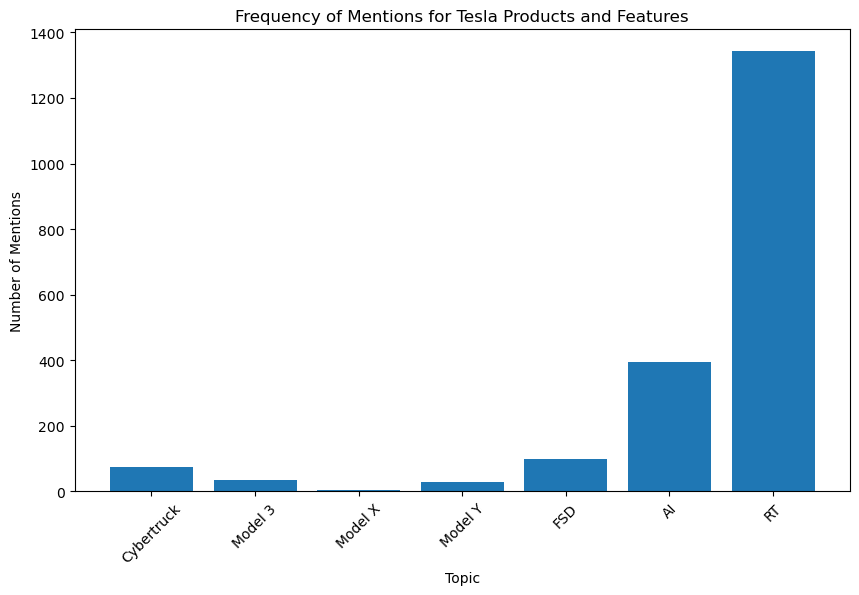

In [36]:
# Counting mentions for each topic
mentions_counts = [
    len(filtered_df), len(filtered_df2), len(filtered_df3), 
    len(filtered_df4), len(filtered_df5), len(filtered_df6), len(filtered_df7)
]

# Creating a DataFrame from the mentions counts
mentions_df = pd.DataFrame({
    'Topic': ['Cybertruck', 'Model 3', 'Model X', 'Model Y', 'FSD', 'AI', 'RT'],
    'Mentions': mentions_counts
})

# Visualizing the frequency of mentions
plt.figure(figsize=(10, 6))
plt.bar(mentions_df['Topic'], mentions_df['Mentions'])
plt.title('Frequency of Mentions for Tesla Products and Features')
plt.xlabel('Topic')
plt.ylabel('Number of Mentions')
plt.xticks(rotation=45)
plt.show()


### VADER

In [37]:
# Initialize the Sentiment Intensity Analyzer
analyzer = SentimentIntensityAnalyzer()

# Calculate sentiment scores for each tweet and store in df2 DataFrame
df["sentiments"] = df["text"].apply(lambda x: analyzer.polarity_scores(x))

# Define the categorization function
def categorize_sentiment(polarity):
    if polarity > 0:
        return 'Positive'
    elif polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Apply the categorization function to compound sentiment scores
df['sentiment_compound'] = df['sentiments'].apply(lambda x: categorize_sentiment(x['compound']))

/var/folders/s2/xss5fp2j1c33yb7n8z1gc6t00000gn/T/ipykernel_53293/4012614802.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["sentiments"] = df["text"].apply(lambda x: analyzer.polarity_scores(x))
/var/folders/s2/xss5fp2j1c33yb7n8z1gc6t00000gn/T/ipykernel_53293/4012614802.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentiment_compound'] = df['sentiments'].apply(lambda x: categorize_sentiment(x['compound']))


/Users/peiiiiu227/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/peiiiiu227/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


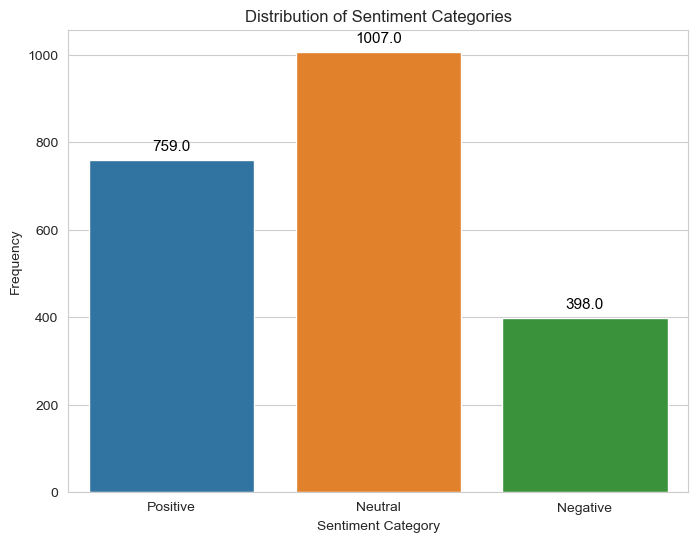

In [38]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Plot the distribution of sentiment categories
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='sentiment_compound', data=df, order=['Positive', 'Neutral', 'Negative'])
plt.title('Distribution of Sentiment Categories')
plt.xlabel('Sentiment Category')
plt.ylabel('Frequency')

# Annotate the count above each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 10),
                textcoords='offset points')

plt.show()

/Users/peiiiiu227/anaconda3/lib/python3.11/site-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


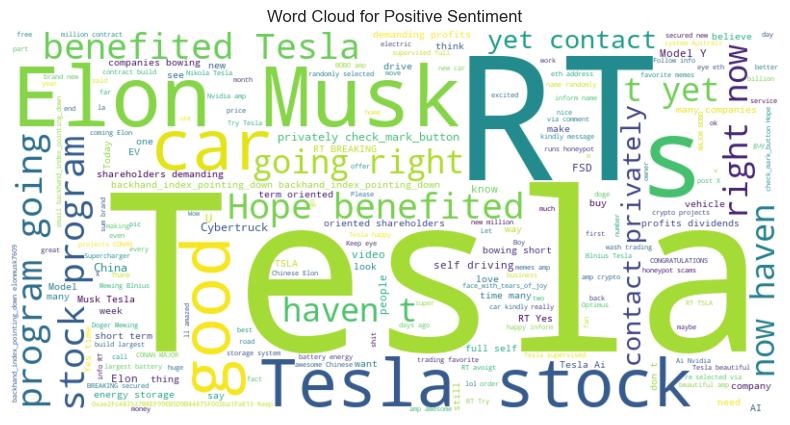

In [39]:
positive_text = df[df['sentiment_compound'] == 'Positive']['text']
all_positive_text = ' '.join(positive_text)

# Create a word cloud for positive texts
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_positive_text)

# Display the generated image:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Word Cloud for Positive Sentiment')
plt.show()

/Users/peiiiiu227/anaconda3/lib/python3.11/site-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


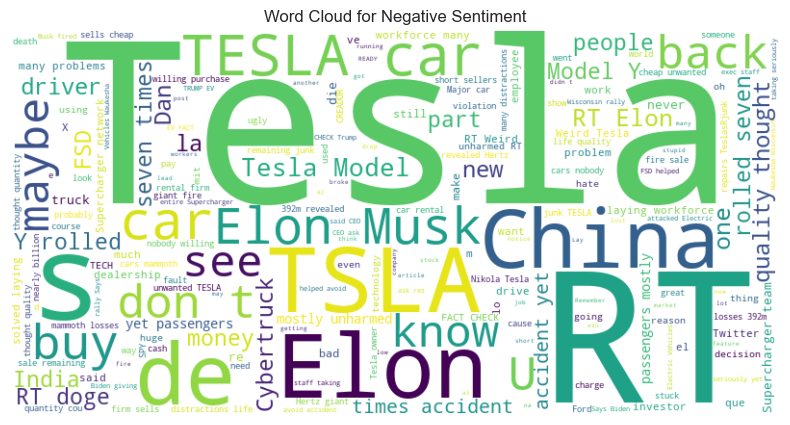

In [40]:
negative_text = df[df['sentiment_compound'] == 'Negative']['text']
all_negative_text = ' '.join(negative_text)


# Create a word cloud for positive texts
wordcloud3 = WordCloud(width=800, height=400, background_color='white').generate(all_negative_text)

# Display the generated image:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud3, interpolation='bilinear')
plt.axis("off")
plt.title('Word Cloud for Negative Sentiment')
plt.show()

In [41]:
df['text'].isnull().sum()

0

### LDA

In [42]:
df_a = df

In [43]:
# stop_words = set(['the','a'])
def generate_tokens(tweet):
    words=[]
    for word in tweet.split(' '):
        if word!='':
           words.append(word)
    return words
#storing the generated tokens in a new column named 'tokens'
df_a['tokens']=df.text.apply(generate_tokens)

/var/folders/s2/xss5fp2j1c33yb7n8z1gc6t00000gn/T/ipykernel_53293/1356749875.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_a['tokens']=df.text.apply(generate_tokens)


In [44]:
df_a['tokens'][0]

['RT',
 'BREAKING',
 'Elon',
 'Musk',
 'dubs',
 'Facebook',
 'Asana',
 'co',
 'founder',
 'Dustin',
 'Moskowitz',
 '"retard"',
 'following',
 'baseless',
 'claims',
 'made',
 'Moskowi…']

In [45]:
def create_dictionary(words):
    return corpora.Dictionary(words)
id2word=create_dictionary(df_a['tokens'])
print(id2word)

Dictionary<6527 unique tokens: ['"retard"', 'Asana', 'BREAKING', 'Dustin', 'Elon']...>


In [46]:
def create_document_matrix(tokens,id2word):
    corpus = []
    for text in tokens:
        corpus.append(id2word.doc2bow(text))
    return corpus
#passing the dataframe column having tokens and dictionary
corpus=create_document_matrix(df_a['tokens'],id2word)
print(df_a['tokens'][0])
print(corpus[0])

['RT', 'BREAKING', 'Elon', 'Musk', 'dubs', 'Facebook', 'Asana', 'co', 'founder', 'Dustin', 'Moskowitz', '"retard"', 'following', 'baseless', 'claims', 'made', 'Moskowi…']
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1)]


In [47]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                            id2word=id2word,
                                            num_topics=5,
                                            random_state=200,
                                             )

In [48]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word, mds="mmds", R=30)
vis

/Users/peiiiiu227/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/peiiiiu227/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/peiiiiu227/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/peiiiiu227/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/peiiiiu227/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: Us

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.161048 -0.003177       1        1  27.811526
4      0.083985  0.194659       2        1  22.684451
0     -0.159665 -0.086412       3        1  19.387106
1     -0.128916  0.112318       4        1  18.716203
2      0.043549 -0.217389       5        1  11.400714, topic_info=        Term        Freq       Total Category  logprob  loglift
3781    and…   78.000000   78.000000  Default  30.0000  30.0000
58        de  189.000000  189.000000  Default  29.0000  29.0000
4444     los   62.000000   62.000000  Default  28.0000  28.0000
541        "   72.000000   72.000000  Default  27.0000  27.0000
478       la   70.000000   70.000000  Default  26.0000  26.0000
...      ...         ...         ...      ...      ...      ...
59        es   11.530468   33.738017   Topic5  -5.7364   1.0979
1280      lo   11.703751   37.808107   Topic5  -5.7215   0.9989
50      make   11.084199   35.700779   Topic5  -5.7759   1.0018
296   #Tesla   11.437577   67.903434   Topic5  -5.7445   0.3903
65        se   10.802160   42.662368   Topic5  -5.8016   0.7979

[333 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
541       1  0.194034      "
541       2  0.041579      "
541       4  0.762278      "
4699      1  0.442435   "The
4699      4  0.049159   "The
...     ...       ...    ...
787       5  0.027137  years
1116      1  0.253512    yet
1116      2  0.253512    yet
1116      4  0.491180    yet
4671      3  0.921434     모델

[584 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 5, 1, 2, 3])